# Test SST Indices Calculations

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import cftime
import utils.sstIndex as sst
import utils._indexDefinitions as _index

First load up the cvdp and figure out the details of the index we want to calculate

In [2]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '005', decode_times=False)

cvdp = cvdpTime.decodeTime(cvdp)

for keys in _index.sstIndex:
    try:
        print(keys, ": ", cvdp[keys].comment_cvdp)
    except:
        print (keys, " not defined in Cvdp")


Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.005.cvdp_data.850-2005.nc']
nino12 :  area average domain (-10:0N, 270:280E)
nino3 :  area average domain (-5:5N, 210:270E)
nino34 :  area average domain (-5:5N, 190:240E)
nino4 :  area average domain (-5:5N, 160:210E)
westIO  not defined in Cvdp
eastIO  not defined in Cvdp


In [3]:
cvdp.indian_ocean_dipole.comment_cvdp

'area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)'

Next load the model outputs, but drop all the variables we don't care about

In [4]:
ds = fh.loadModelData('CESM-LME', 'SST', '005',drop_variables=('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t', 'ULAT', 'ULONG') )

Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.085001-089912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.090001-099912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.100001-109912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.110001-119912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.120001-129912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.130001-139912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.140001-149912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.150001-159912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.160001-169912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.170001-179912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.180001-184

In [5]:
%time


ds = sst.calculateIndex(ds, _index.sstIndex)

Wall time: 0 ns


C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence

Sanity check that the areas selected look believable

Calculate nino34

(calculatedDmi-iodCvdp).plot()

Do a comparison plot. Between calculated index and cvdp

C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


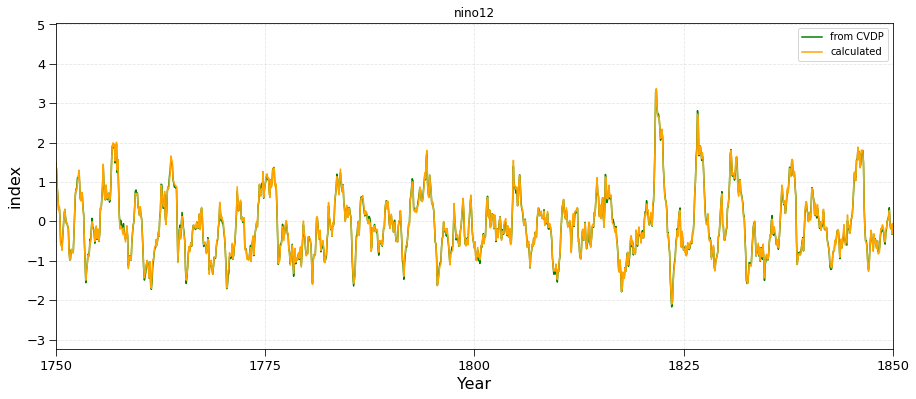

nino12  standard devition of difference:  0.04845021699883295


C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


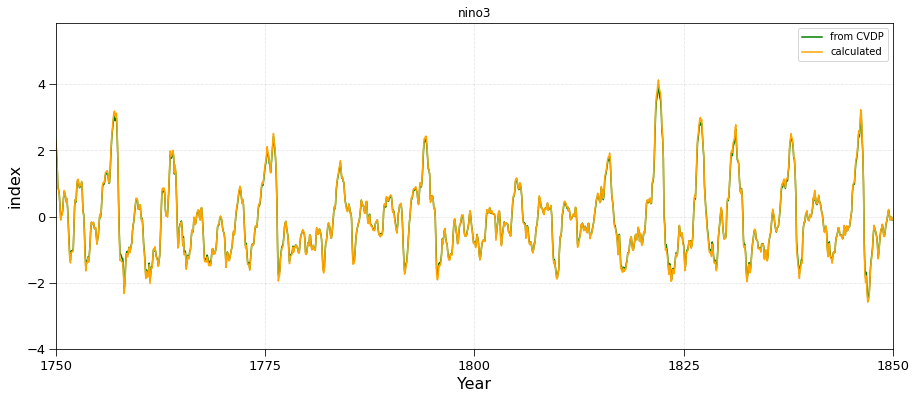

nino3  standard devition of difference:  0.05986970605687629


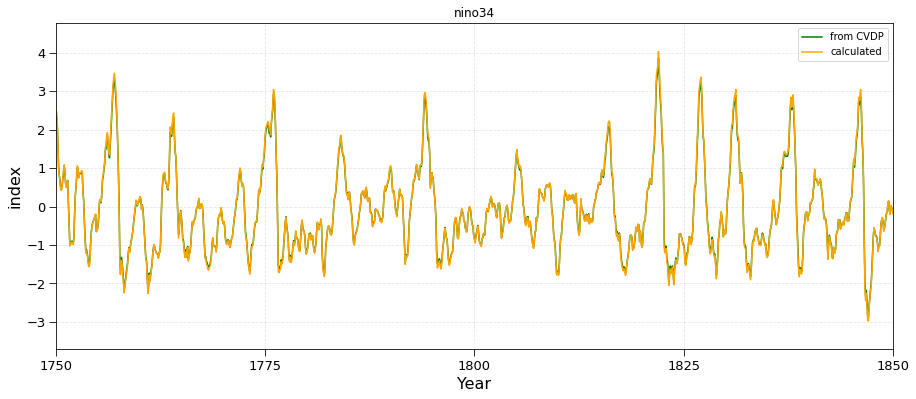

nino34  standard devition of difference:  0.054072379367523585


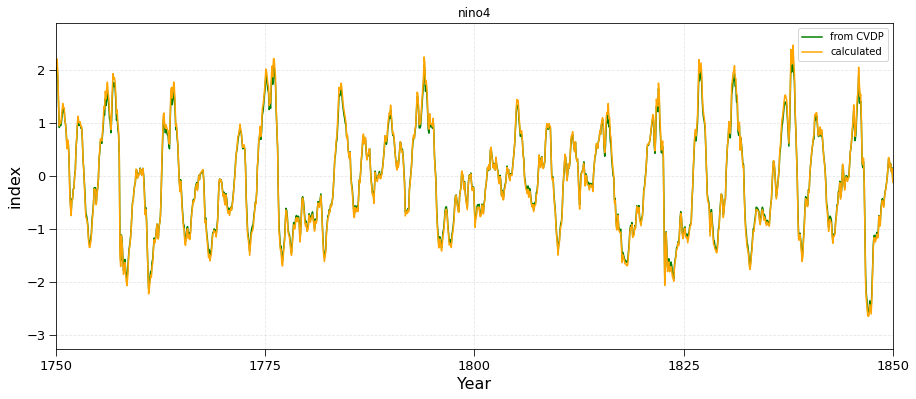

nino4  standard devition of difference:  0.06244162808981649
westIO  not defined in Cvdp
eastIO  not defined in Cvdp


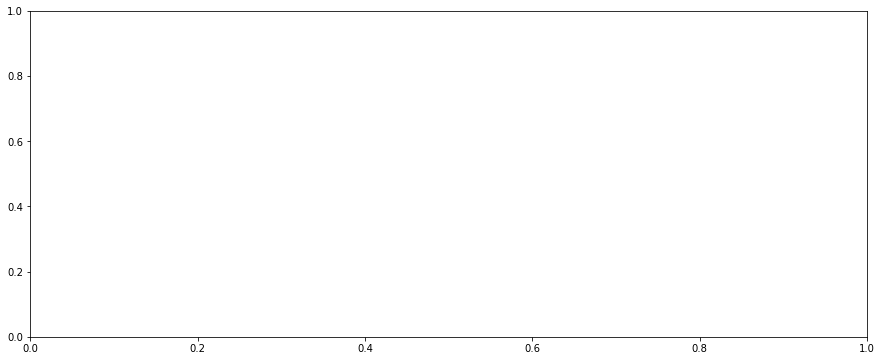

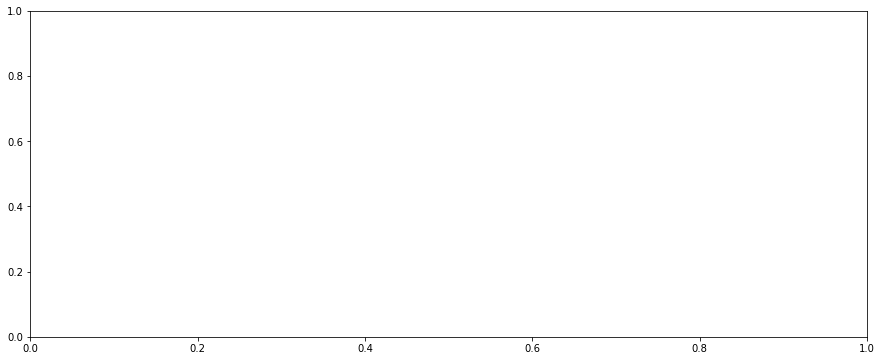

In [6]:
for keys in _index.sstIndex:
    
    
    
    try:
        ds[keys].load()
        
        ds[keys]
        
        # Plot
        fig = plt.figure(figsize=(15,6))
        ax = fig.add_subplot(1, 1, 1)

        cvdp[keys].plot(color='green' ,label='from CVDP')
        
        ds[keys].load()
        
        #domainAv.plot(color='red',label='based on cosine Lat')
        ds[keys].plot(color='orange',label='calculated')
    
        plt.xlim(cftime.DatetimeNoLeap(1750,1,1), cftime.DatetimeNoLeap(1850,1,1))

        plt.title(keys)
        plt.ylabel("index", fontsize=16)  
        plt.xlabel("Year", fontsize=16)

        plt.tick_params(which = 'minor', labelsize=13, length=4)
        plt.tick_params(which = 'major', labelsize=13, length=7)
        ax.grid(which='major', alpha=0.3, linestyle='dashed')

        plt.legend()

        plt.show()

        print(keys, " standard devition of difference: ", (ds[keys]-cvdp[keys]).std().values)

        
    except:
        print (keys, " not defined in Cvdp")

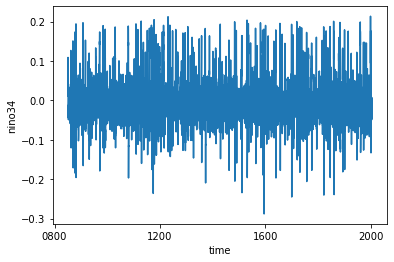

In [7]:
(ds.nino34-cvdp.nino34).plot()

Special treatment for IOD

In [8]:
ds['iod'] = ds['westIO'] - ds['eastIO']

C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


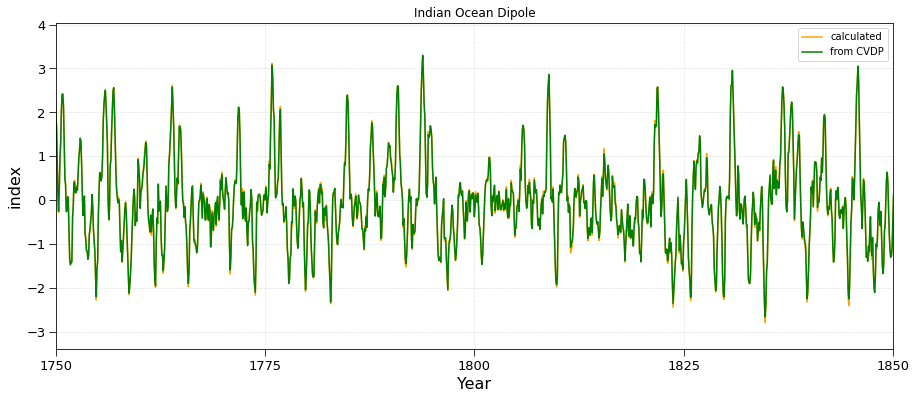

In [9]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

#domainAv.plot(color='red',label='based on cosine Lat')
ds['iod'].plot(color='orange',label='calculated')
cvdp.indian_ocean_dipole.plot(color='green' ,label='from CVDP')

plt.xlim(cftime.DatetimeNoLeap(1750,1,1), cftime.DatetimeNoLeap(1850,1,1))

plt.title("Indian Ocean Dipole")
plt.ylabel("index", fontsize=16)  
plt.xlabel("Year", fontsize=16)

plt.tick_params(which = 'minor', labelsize=13, length=4)
plt.tick_params(which = 'major', labelsize=13, length=7)
ax.grid(which='major', alpha=0.3, linestyle='dashed')

plt.legend()

plt.show()

In [ ]:
ds.to_netcdf("../results/monthlySstIndicesCalculated.nc")